In [2]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOAD THE DATASET

data = pd.read_csv("Retail and Warehouse Sale.csv")
data.head()                 # To get first 5 rows

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
# CHECKING DATATYPE

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [5]:
# CHECK FOR THE SUMMARY

data.describe(include='all')

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29967,30000,30000,30000,29999.000000,30000.000000,30000.000000
unique,NaN,NaN,290,15668,15732,8,NaN,NaN,NaN
top,NaN,NaN,"THE COUNTRY VINTNER, LLC DBA WINEBOW",14206,TENTH WARD DIST CO CARAWAY RYE - 750ML,WINE,NaN,NaN,NaN
freq,NaN,NaN,2041,4,5,18680,NaN,NaN,NaN
mean,2020.0,3.911467,NaN,NaN,NaN,NaN,6.939796,6.594058,27.431031
std,0.0,2.836788,NaN,NaN,NaN,NaN,33.081054,27.879428,272.166085
min,2020.0,1.000000,NaN,NaN,NaN,NaN,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2020.0,3.000000,NaN,NaN,NaN,NaN,0.160000,0.000000,1.000000
75%,2020.0,7.000000,NaN,NaN,NaN,NaN,2.920000,3.000000,6.000000


In [6]:
# CHECK FOR MISSING VALUES

data.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [7]:
# FILLING MISSING VALUES OF SUPPLIER 
data["SUPPLIER"] = data["SUPPLIER"].fillna("Unknown")

# FILLING MISSING VALUES OF RETAIL SALES
data["RETAIL SALES"] = data["RETAIL SALES"].fillna(0)
data.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

<Axes: ylabel='RETAIL SALES'>

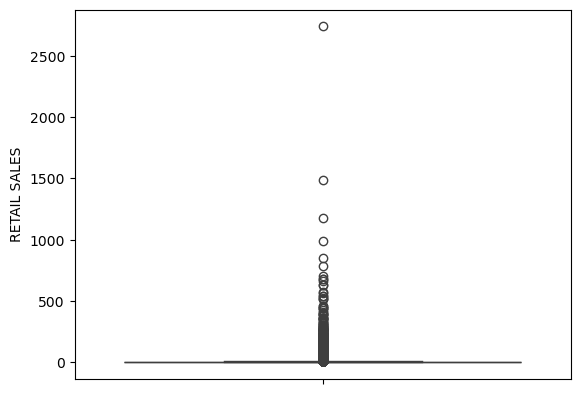

In [8]:
# CHECK FOR OUTLIERS

sns.boxplot(data=data["RETAIL SALES"]) 

In [9]:
# CREATE DATE COLUMN

data["YEAR"] = data["YEAR"].astype(str)
data["MONTH"] = data["MONTH"].astype(str)
data["YEARMON"] = data["YEAR"] + "-" + data["MONTH"]
data["DATE"] = pd.to_datetime(data["YEARMON"] + "-01")

In [10]:
# CREATE TOTAL SALES COLUMN

data["TOTAL SALES"] = data["RETAIL SALES"] + data["WAREHOUSE SALES"]
# CREATE RETAIL ACTIVITY

data["RETAIL ACTIVITY"] = data["RETAIL SALES"] + data["RETAIL TRANSFERS"] 
data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,YEARMON,DATE,TOTAL SALES,RETAIL ACTIVITY
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-1,2020-01-01,2.00,0.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-1,2020-01-01,4.00,1.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-1,2020-01-01,1.00,0.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-1,2020-01-01,1.00,0.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-1,2020-01-01,0.82,0.82


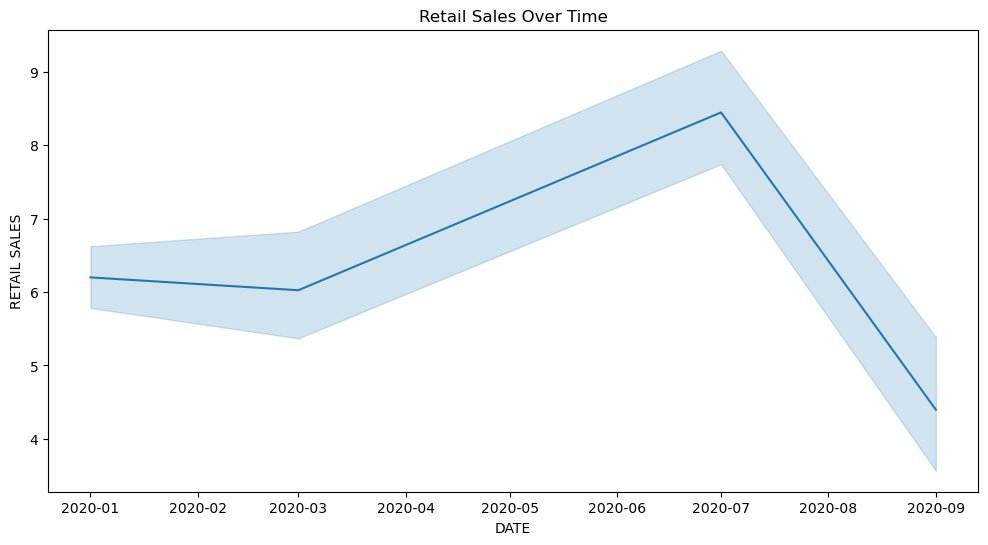

In [11]:
# LINEPLOT OF RETAIL SALES OVER TIME

plt.figure(figsize=(12,6))
sns.lineplot(x='DATE',y='RETAIL SALES',data=data)
plt.title('Retail Sales Over Time')
plt.show()

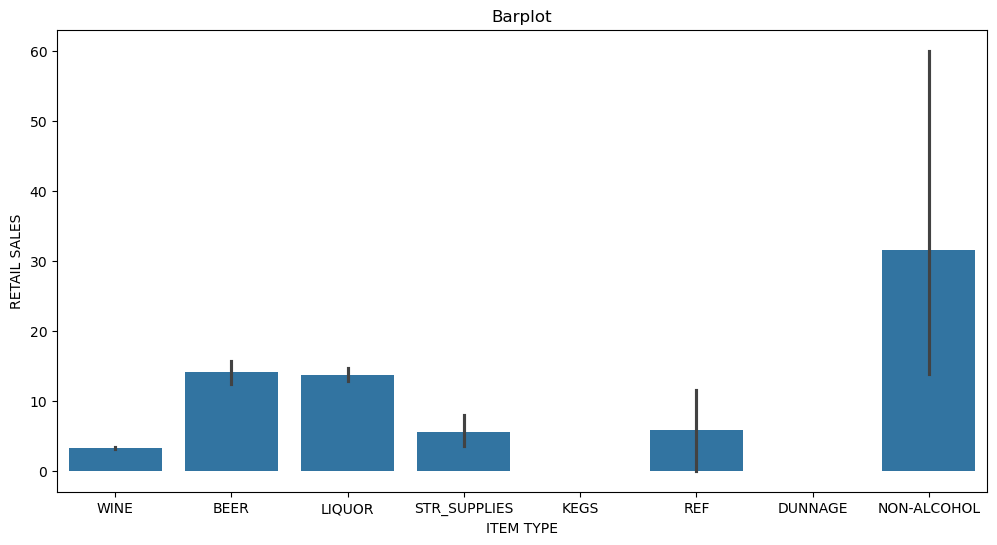

In [12]:
# BAR PLOT OF SALES BY ITEM TYPE

plt.figure(figsize=(12,6))
sns.barplot(x='ITEM TYPE',y='RETAIL SALES',data=data)
plt.title('Barplot')
plt.show()

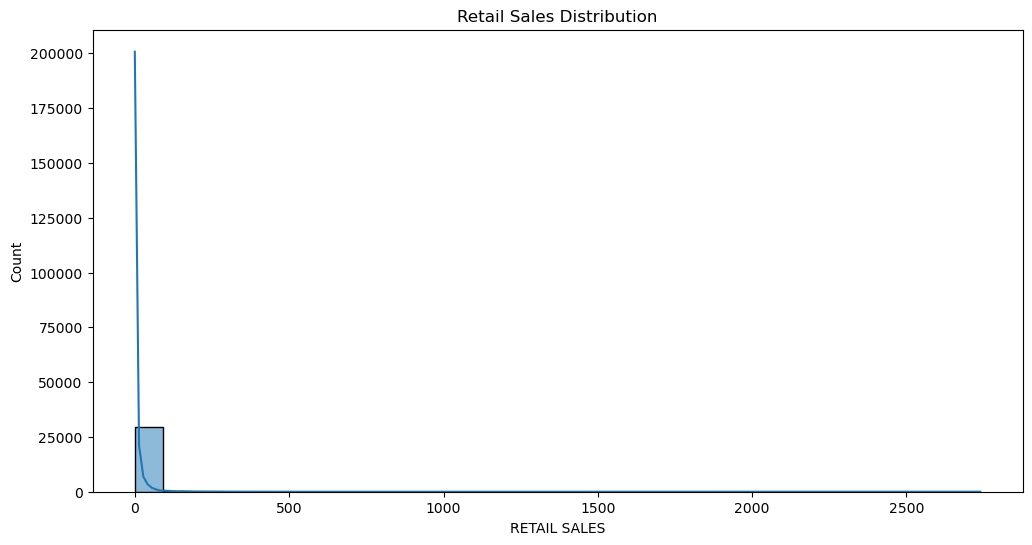

In [13]:
# HISTOGRAM OF RETAIL SALES

plt.figure(figsize=(12,6))
sns.histplot(data['RETAIL SALES'],bins=30,kde=True)
plt.title('Retail Sales Distribution')
plt.show()

In [14]:
# SAVE THE DATA

data.to_csv("Retail and Warehouse Sales Cleaned.csv",index=False)